<a href="https://colab.research.google.com/github/rathika0706/Hypothesis-Testing-Analysis-of-Yulu-Bike-Sharing/blob/main/Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Yulu- Hypothesis Testing**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**Problem Statement:**

The company wants to know:

Which variables are significant in predicting the

*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*  How well those variables describe the electric cycle demands?


Importing important libraries


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [156]:
df= pd.read_csv("bike_sharing.csv")

Checking the Structure and Charactristics of the dataset.

In [157]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [158]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Column Profiling:

datetime: datetime

*   datetime: datetime

*   season: season (1: spring, 2: summer, 3: fall, 4: winter)

*   holiday: whether day is a holiday or not
*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0

*   weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp: temperature in Celsius

*   atemp: feeling temperature in Celsius
*   humidity: humidity


*   casual: count of casual users
*   registered: count of registered users


*   count: count of total rental bikes including both casual and registered


















In [159]:
df.shape

(10886, 12)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [161]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Checking for null and duplicated values.

In [162]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [163]:
np.any((df.duplicated()))

False

We observe that there are no null and duplicated values present in the dataset.

Converting datatypes of certain columns for better data exploration and analysis.

In [164]:
df["datetime"]=pd.to_datetime(df["datetime"])

In [165]:
def season_category(x):
  if x==1:
    return "spring"
  if x==2:
    return "summer"
  if x==3:
    return "fall"
  if x==4:
    return "winter"
df["season"]=df["season"].apply(season_category)


In [166]:
cat_columns=["season", "holiday","workingday", "weather"]
for col in cat_columns:
  df[col]=df[col].astype("object")


In [167]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0,0,1,1


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [169]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,winter,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Timeframe of the given data.

In [170]:
print("Timeframe of the given data:", df["datetime"].min(),"to", df["datetime"].max())

Timeframe of the given data: 2011-01-01 00:00:00 to 2012-12-19 23:00:00


In [171]:
df["datetime"].max() - df["datetime"].min()

Timedelta('718 days 23:00:00')

Univariate Analysis

Understanding the distribution of numerical variables using histogram.

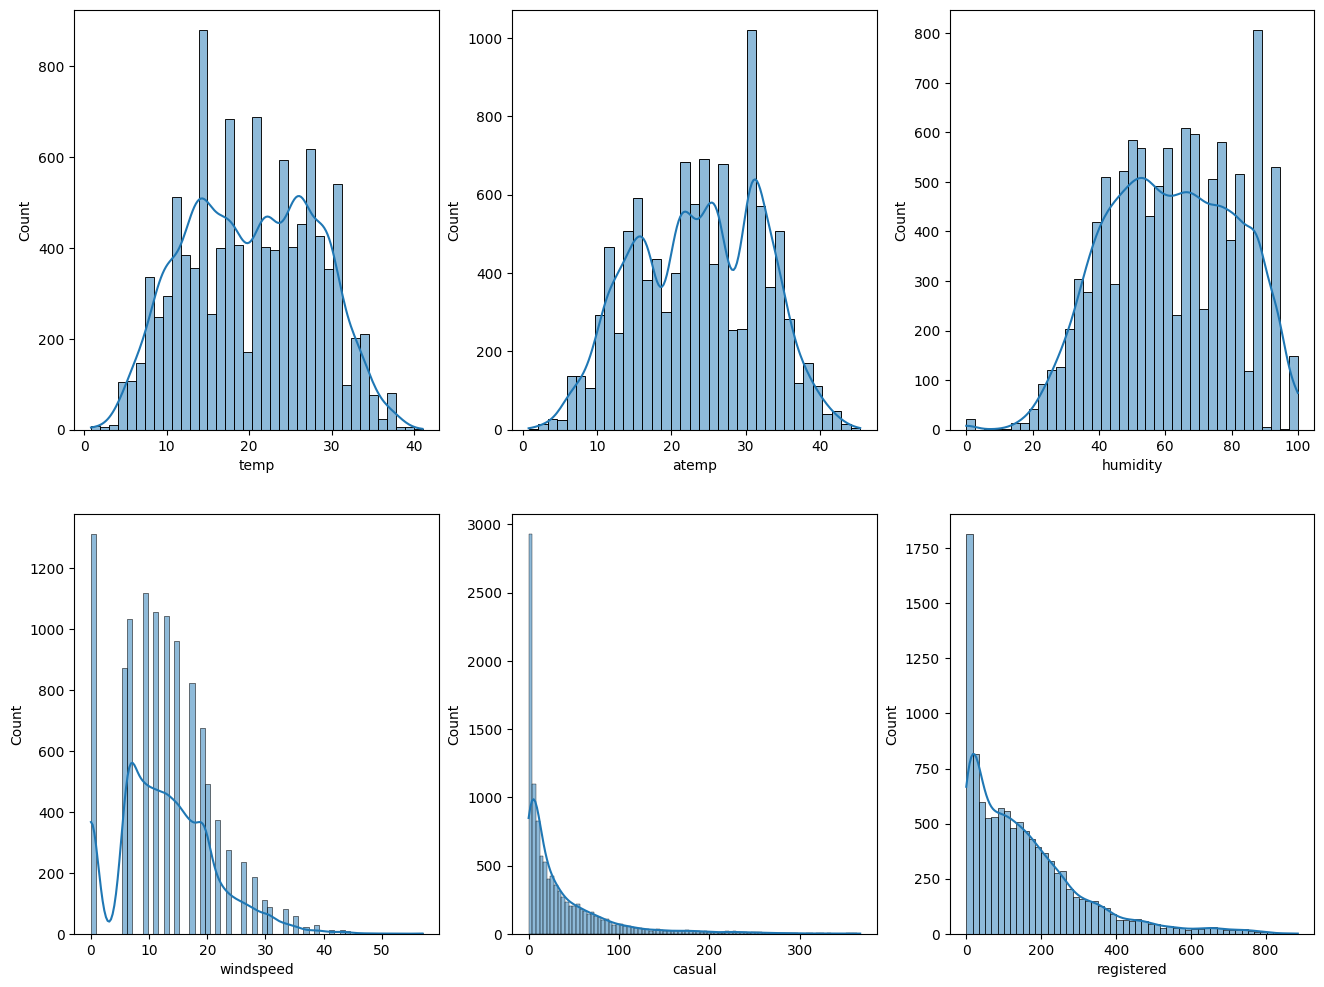

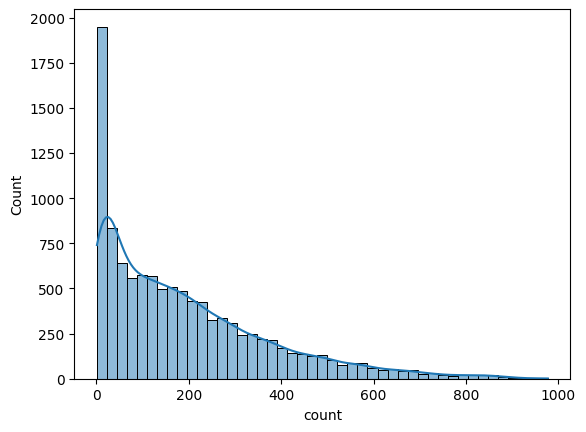

In [172]:
num_columns=["temp","atemp","humidity","windspeed","casual","registered","count"]
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,12))
index=0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_columns[index]], ax=axis[row,col], kde=True)
    index +=1
plt.show()
sns.histplot(df[num_columns[-1]], kde=True)
plt.show()




1. We observe that temp, atemp, humidity follow Normal distribution
2.  Count, casual, registered follow log normal distribution



Detecting outliers in numerical varaible using Boxplot.

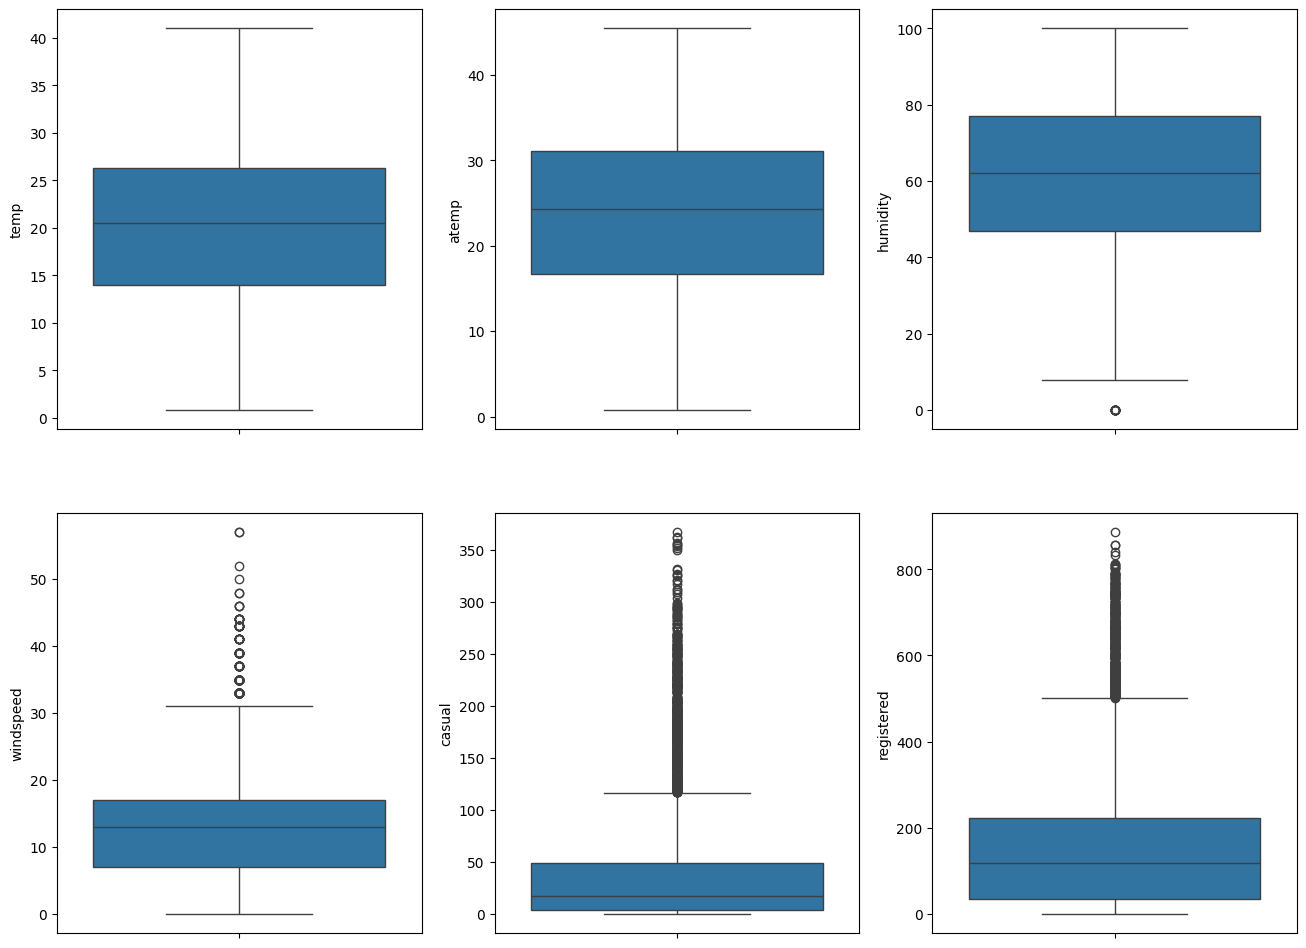

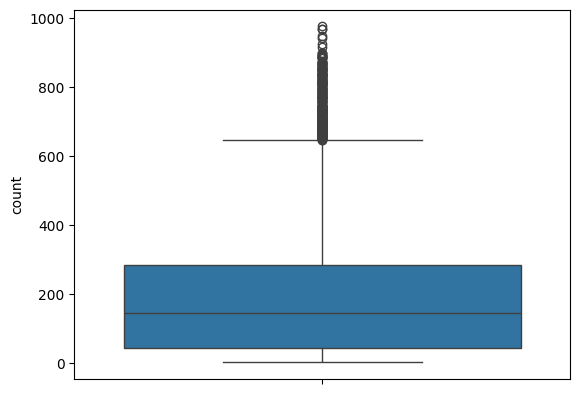

In [173]:
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,12))
index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(df[num_columns[index]], ax=axis[row,col])
    index +=1
plt.show()
sns.boxplot(df[num_columns[-1]])
plt.show()

We observe outliers in columns windspeed, casual, registered and few outliers in humidity column.

Understanding categorical variables using countplot





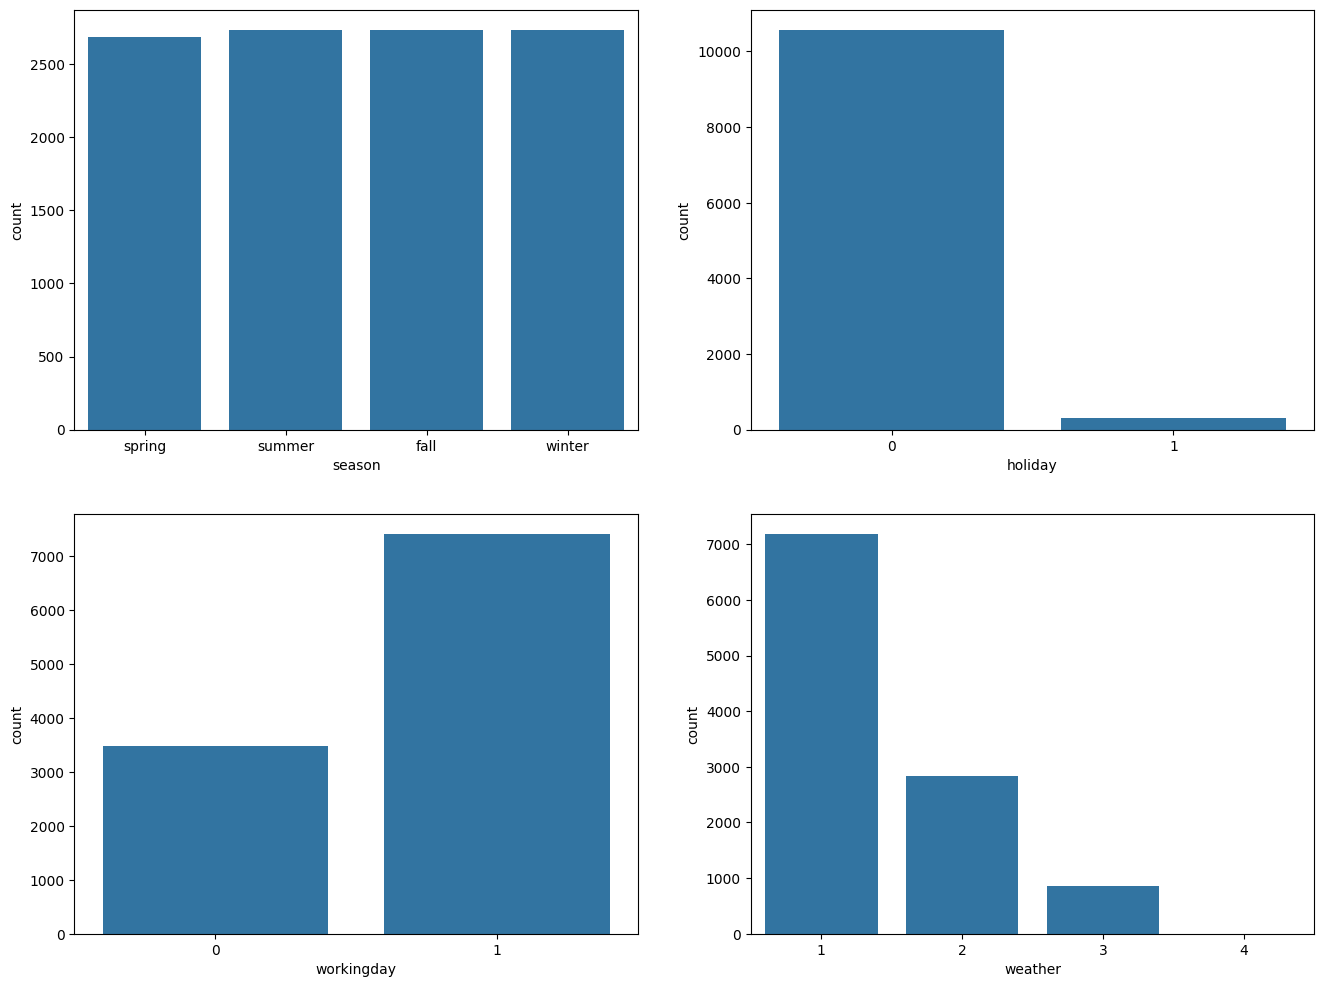

In [174]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
index=0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df, x=cat_columns[index], ax=axis[row,col])
    index +=1
plt.show()


Data looks common in season column as each season contains equal number of days, more number of working days and weather looks mostly clear,few clouds, partly cloudy.

Bivariate Analysis:

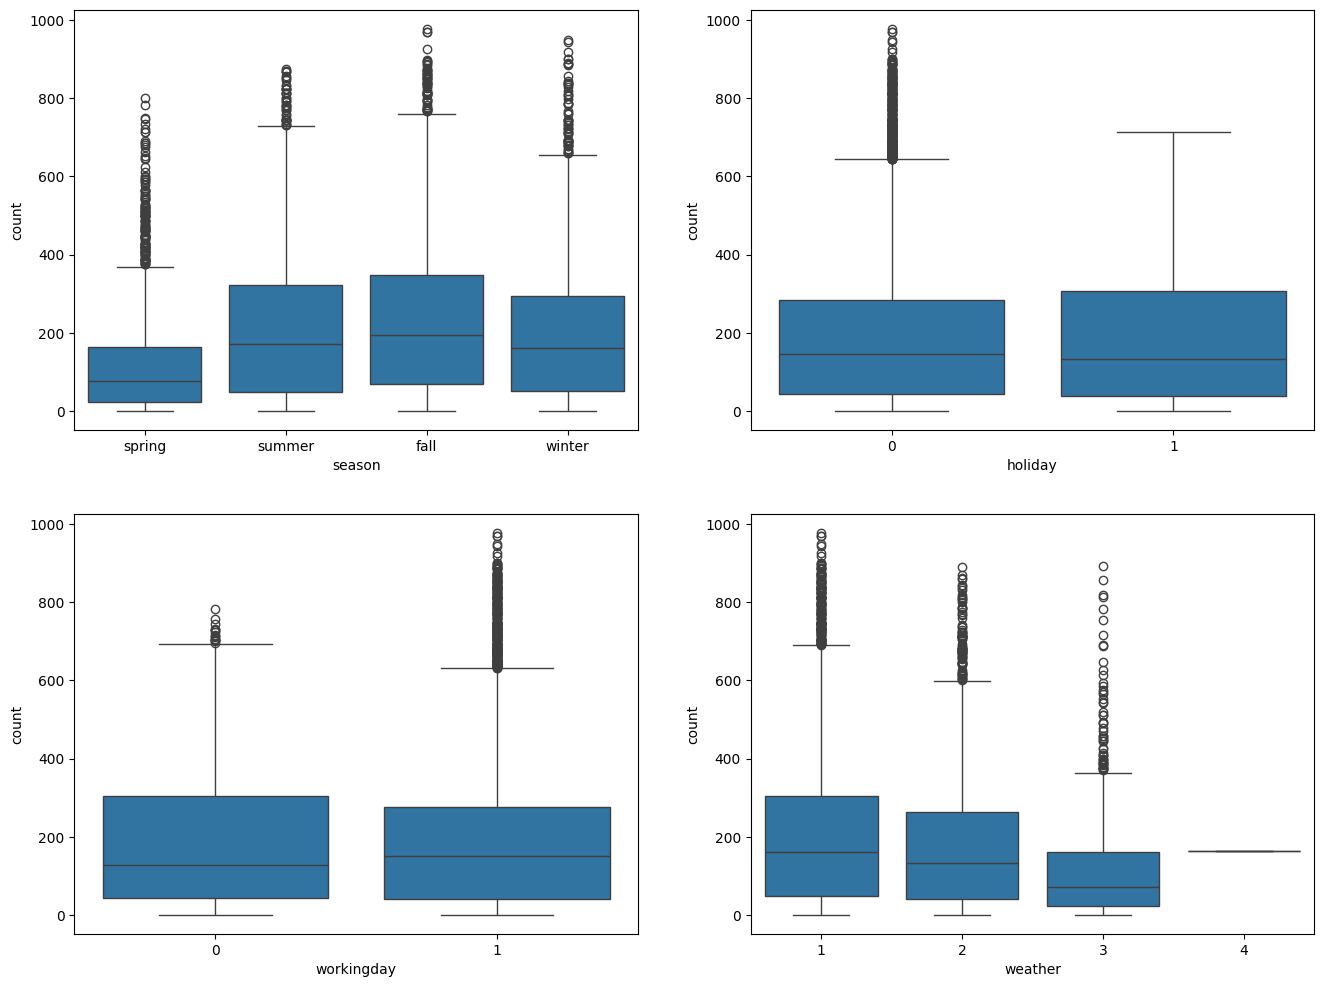

In [175]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(16,12))
index=0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_columns[index], y= "count" , ax=axis[row,col])
    index +=1
plt.show()



1.   In **summer and fall**, more number of bikes were rented as compared to other seasons.
2.   Whenever its** holiday**, more  number of bikes were rented.
3.  It ia also clear from the workingday column that more number of bikes were rented when its **either weekend or holiday.**
4.  Whenever there is **rain, thunderstorm, snow or fog**, there were less bikes were rented.






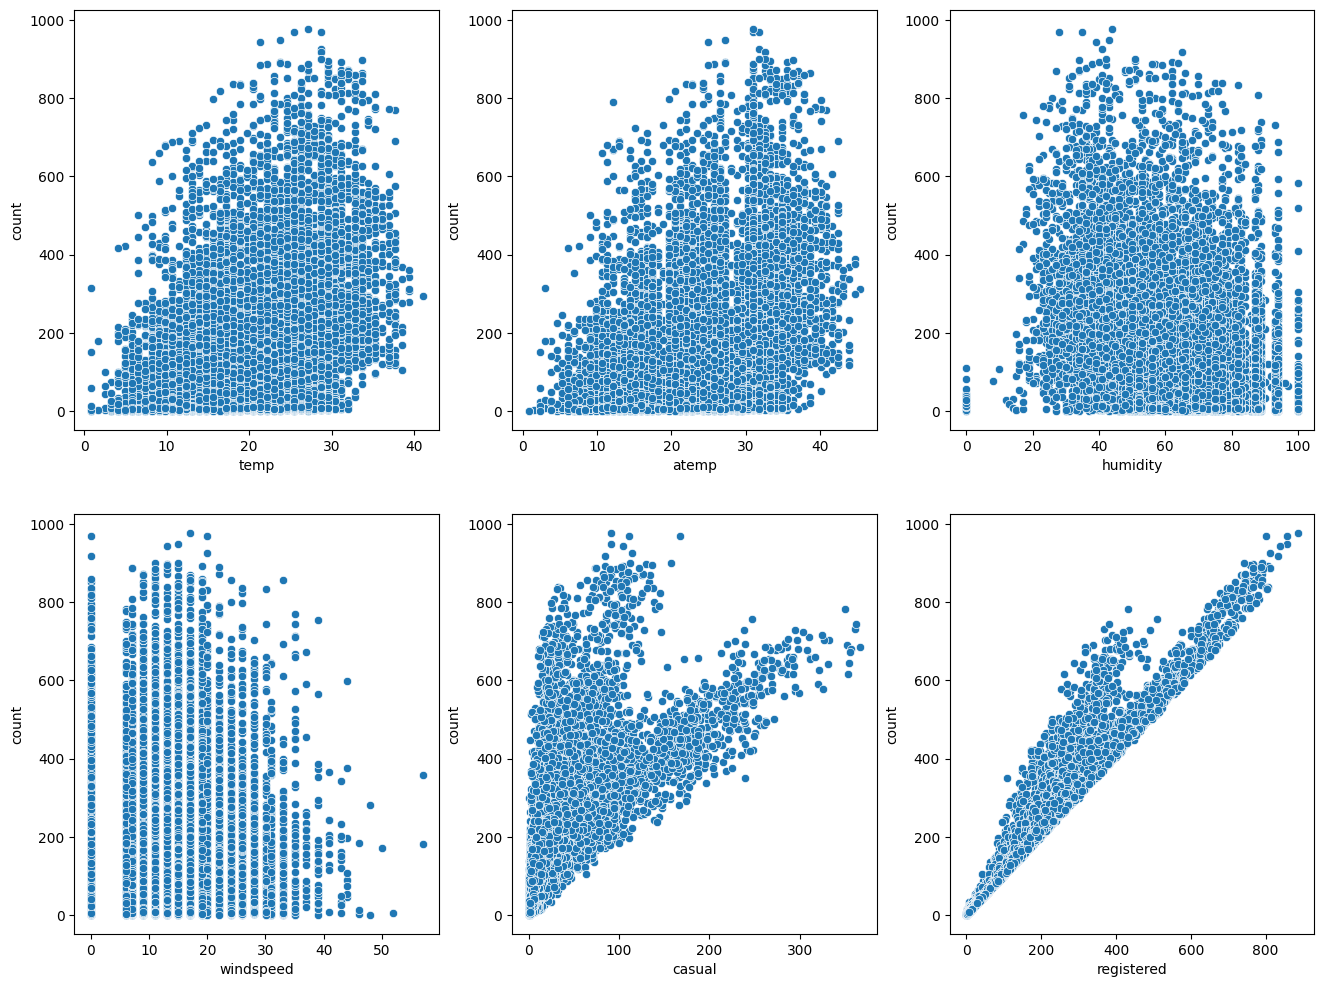

In [176]:
fig,axis=plt.subplots(nrows=2,ncols=3,figsize=(16,12))
index=0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_columns[index], y= "count" , ax=axis[row,col])
    index +=1
plt.show()



1.   Less bikes were rented when **temperature** is **less than 10 degree celsius.**
2.   Less bike were rented when **humidity** is **less than 20.**
3.   Less bikes were rented when **windspeed** is **greater than 35**.




**Hypothesis Testing 1:**


**Step1**: Set up Null(HO) and alternate(Ha) hypothesis


*   **Null hypothesis**:Working Day has no effect on number of electric cycles rented.
*   **Alternate hypothesis**: Working Day has significant effect on number of electric cycles rented.


**Step 2**: Checking for basic assumptions for the hypothesis


*   Normality test using **QQ plot** or **Shapiro Wilk test**
*   Test of Variability using **Levene's test**


**Step 3**: Defining test statistics and distribution under Ho.


*   If assumptions of T Test are met, then perform independent T test, else perform non-parametric test for independent samples **Mann-Whitney U rank test**  which is used to test if two sample means are equal or not.

**Step 4**: Compute p-value and set significance level(alpha)


*   We set our alpha to be **0.05**


**Step 5**: Compare p-value with alpha,
based on p-value, we will accept or reject H0.

*   p-val > alpha : Accept H0
*   p-val < alpha : Reject H0











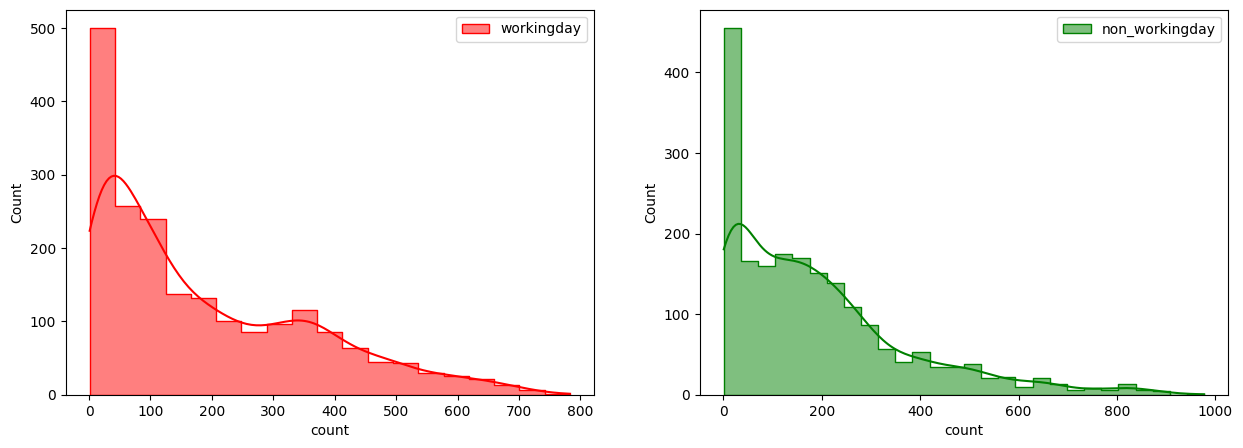

In [177]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df.loc[df["workingday"]==0, "count"].sample(2000),
             element ="step",
             color="red",
             kde= True, label="workingday")
plt.legend()
plt.subplot(1,2,2)
sns.histplot(df.loc[df["workingday"]==1, "count"].sample(2000),
             element ="step",
             color="green",
             kde= True, label="non_workingday")
plt.legend()
plt.show()



The above graph shows that it is not a normal ditribution. We perform QQ plot and Shapiro-Wilk test to check again for normality for accurate results.

In [178]:
import statsmodels.api as sm

<Figure size 300x200 with 0 Axes>

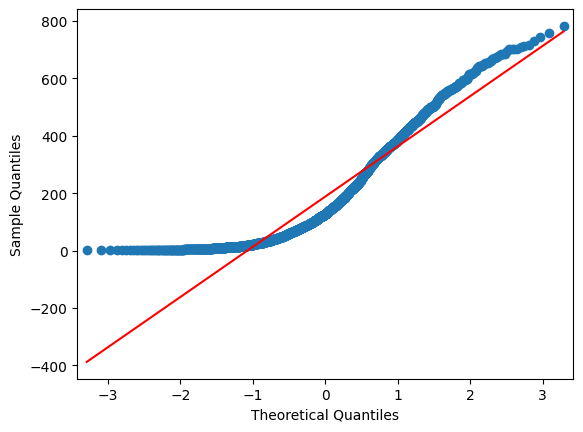

In [179]:
plt.figure(figsize=(3,2))
sm.qqplot(df.loc[df["workingday"]==0, "count"].sample(2000),line="s")
plt.show()

<Figure size 900x500 with 0 Axes>

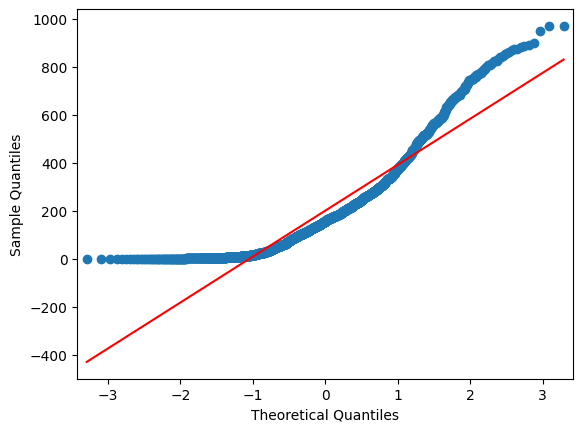

In [180]:
plt.figure(figsize=(9,5))
sm.qqplot(df.loc[df["workingday"]==1, "count"].sample(2000),line="s")
plt.show()

We observe that workingday doesnt follow normal distribution since our graph is non-linear

**Shapiro-Wilk Test for Normality:**


H0: The sample follows normal distribution

Ha: The sample doesnt follow normal distribution

Alpha-value = 0.05


In [197]:
from scipy.stats import shapiro, levene, mannwhitneyu,kruskal

In [182]:
test_stat, p_value = shapiro(df.loc[df['workingday'] == 1, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.103243581697349e-37
The sample does not follow normal distribution


In [183]:
test_stat, p_value = shapiro(df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.483271169188894e-36
The sample does not follow normal distribution


Hence we conclude that workingday column does not follow normal distribution after performing all necessary tests and plots.

We check for homogenous varriance uisng **Levene's test of variability**


ho: homogenous varriance


ha:non-homogenous varriance

In [184]:
test_stat, p_value = levene(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.5337313109784598
The samples have Homogenous Variance 


We observe that samples failed normality test, hence we perform non-parametric test equivalent of t test which is **Mann Whitney U rank test.**

In [185]:
test_stat, p_value = mannwhitneyu(df.loc[df['workingday'] == 1, 'count'].sample(2000),
                                df.loc[df['workingday'] == 0, 'count'].sample(2000))
print('p-value', p_value)
if p_value < 0.05:
  print('No.of electric cycles rented is not similar for working and non working days')
else:
    print('No.of electric cycles rented is similar for working and non working days')


p-value 0.7897869237962631
No.of electric cycles rented is similar for working and non working days


Therefore we conclude that number of electric bikes rented is statistically similar for both woking and non-working days.

**Hpothesis Testing 2:**


Step1: Set up Null(HO) and alternate(Ha) hypothesis

Null hypothesis:Mean of cycles rented  are similar in all four  seasons


Alternate hypothesis: Mean of cycles rented are different in all four seasons.


Step 2: Checking for basic assumptions for the hypothesis



*   Normality test using QQ plot or Shapiro Wilk test

*   Levene's test of varaibility
*   Each observation is independent.











Step 3: Defining test statistics and distribution under Ho.


We   perform one way ANOVA test which follows F distibution.


Step 4: Compute p-value and set significance level(alpha)

We set our alpha to be 0.05


Step 5: Compare p-value with alpha, based on p-value, we will accept or reject H0.


p-val > alpha : Accept H0


p-val < alpha : Reject H0

In [186]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']

Test for Normality using QQ plot and Shapiro Wilk test:

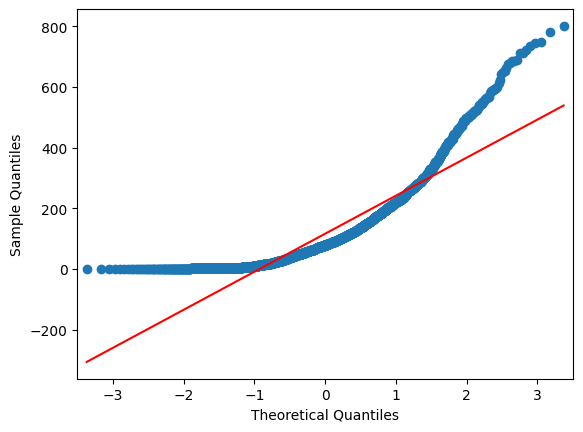

In [187]:
sm.qqplot(df_season_spring,line="s")
plt.show()



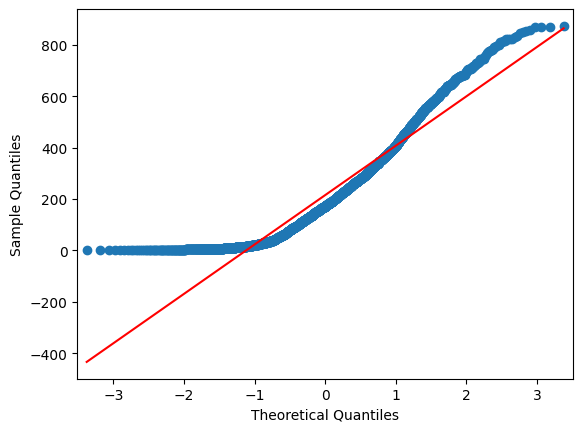

In [188]:
sm.qqplot(df_season_summer,line="s")
plt.show()



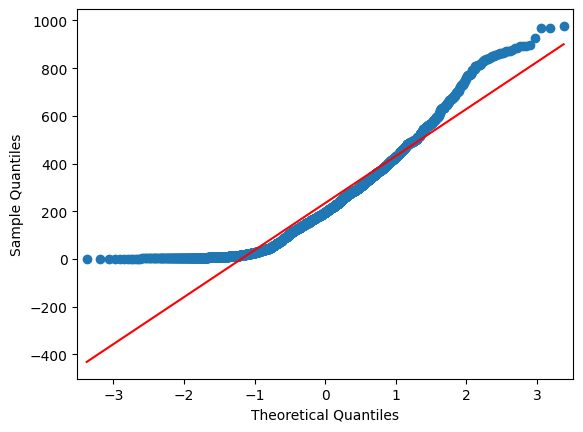

In [189]:
sm.qqplot(df_season_fall,line="s")
plt.show()



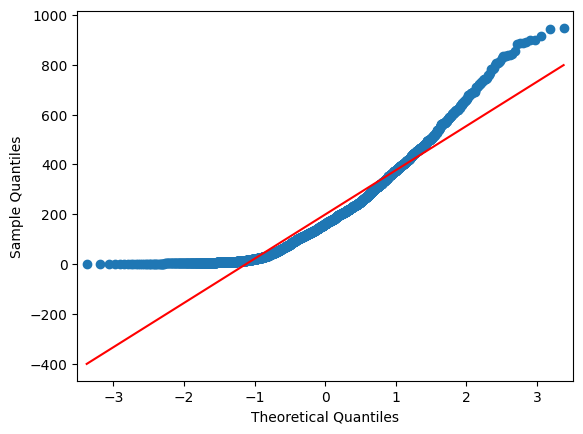

In [190]:
sm.qqplot(df_season_winter,line="s")
plt.show()

We observe that all four seasons doesnot follow normal distribution.

Shapiro Wilk test:

Ho: Samples follow normal distribution

Ha: Samples doesnt follow normal distribution

alpha value=0.05

In [191]:
test_stat, p_value =shapiro(df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [192]:
test_stat, p_value =shapiro(df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.039093315091269e-39
The sample does not follow normal distribution


In [193]:
test_stat, p_value =shapiro(df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.043458045587339e-36
The sample does not follow normal distribution


In [194]:
test_stat, p_value =shapiro(df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1301682309549298e-39
The sample does not follow normal distribution


Levene's Test of Variability:

Ho: Homogenous varriance


Ha: Non-homogenous varriance

In [196]:
test_stat, p_value = levene(df_season_spring,
                                df_season_summer,
                                df_season_fall,
                                df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 1.0147116860043298e-118
The samples do not have  Homogenous Variance


Thus from the above tests we find that assumptions of one way ANOVA test are not met. Hence we perform non-parametric test alternative to ANOVA i.e., **Krsukal Wallis Test**

In [198]:
#Ho: Mean number of cycles are similar for all four seasons
#Ha: Mean number of cycles are different for all four seasons
alpha =0.05
test_stat, p_value = kruskal(df_season_summer,df_season_fall, df_season_spring, df_season_winter)
print("p_value:", p_value)
if p_value<alpha:
  print("Mean number of cycles are different for all four seasons")
else:
  print("Mean number of cycles are similar for all four seasons")


p_value: 2.479008372608633e-151
Mean number of cycles are different for all four seasons


Thus number of electric bikes rented are statistically different in different seasons.

**Hypothesis Testing 3:**


Step1: Set up Null(HO) and alternate(Ha) hypothesis

Null hypothesis:No. of cycles rented similar in different weather

Alternate hypothesis: No. of cycles rented are not similar in different weather.

Step 2: Checking for basic assumptions for the hypothesis




*   Normality test using QQ plot or Shapiro Wilk test
*   Levene's test of varaibility


*   Each observation is independent.




Step 3: Defining test statistics and distribution under Ho.

  We perform one way ANOVA test which follows F distibution.

Step 4: Compute p-value and set significance level(alpha)

We set our alpha to be 0.05

Step 5: Compare p-value with alpha, based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

In [199]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [200]:
df_weather1 = df.loc[df['weather'] == 1 ,"count"].sample(600)
df_weather2 = df.loc[df['weather'] == 2,"count"].sample(600)
df_weather3 = df.loc[df['weather'] == 3,"count"].sample(600)


We perform ANOVA test only on 1,2,3 weather, because there is only one data on weather 4 which we neglect for better analysis.

Test for Nomality: QQ plots, Shapiro-Wilk test

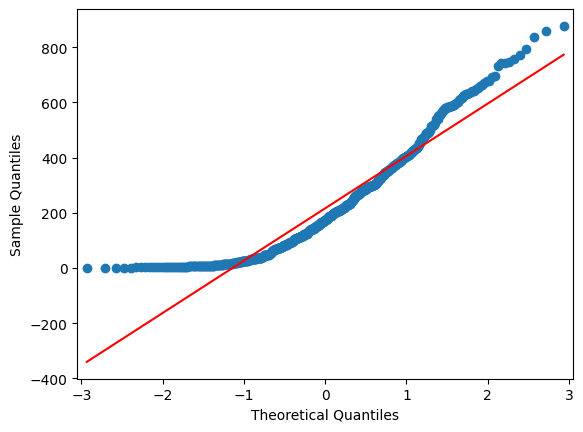

In [201]:
sm.qqplot(df_weather1, line="s")
plt.show()

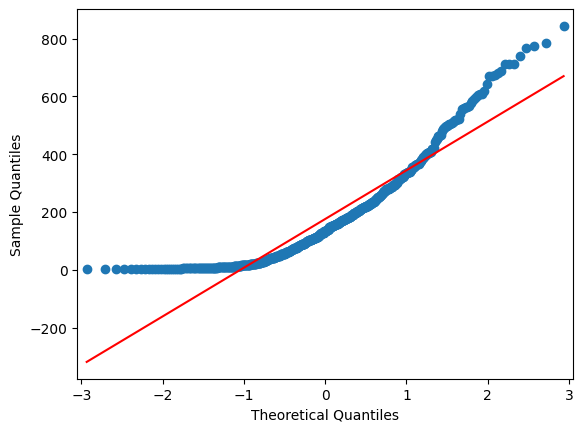

In [202]:
sm.qqplot(df_weather2, line="s")
plt.show()

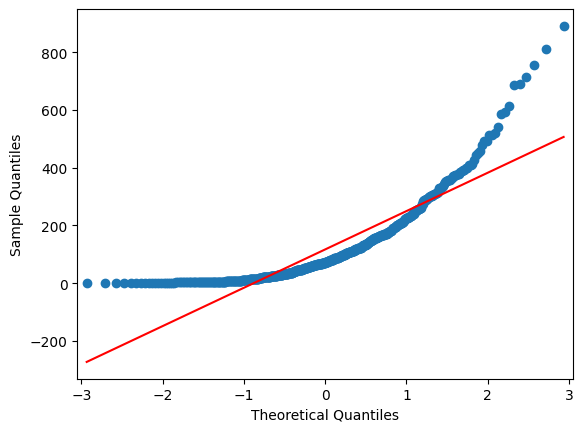

In [203]:
sm.qqplot(df_weather3,line="s")
plt.show()

We observe that weather doeesnt follow normal distribution.


**Shapiro-Wilk Test:**

Ho: Samples follow normal distribution


Ha: Samples doesnt follow Normal distribution


alpha value=0.05


In [204]:
test_stat, p_value = shapiro(df_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 6.821870181107514e-19
The sample does not follow normal distribution


In [206]:
test_stat, p_value = shapiro(df_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.999140519186296e-22
The sample does not follow normal distribution


In [207]:
test_stat, p_value = shapiro(df_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7599663981035657e-27
The sample does not follow normal distribution


**Levene's test:**

Ho: Homogenous varraince

Ha: Non- homgenous varriance.


In [208]:
test_stat, p_value =levene(df_weather1,
                                df_weather2,
                                df_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 4.7734820942768804e-18
The samples do not have  Homogenous Variance


Since ANOVA test assumptions are not met, we perform Kruskal Wallis test.


**Krsukal Wallis Test:**

Ho: Mean number of electric bikes rented are similar for different weather

Ha: Mean number of electric bikes rented are not similar for different weather.



In [209]:
alpha=0.05
test_statistic, p_value= kruskal(df_weather1, df_weather2, df_weather3)
print("p_value:", p_value)
if p_value< 0.05:
  print("Mean number of electric bikes rented are not similar for different weather")
else:
  print("Mean number of electric bikes rented are similar for different weather")


p_value: 1.2038311693028954e-22
Mean number of electric bikes rented are not similar for different weather


Thus we observe that number of electric bikes rented are statistically different for different weathers.

**Hypothesis testing 4:**


Step1: Set up Null(HO) and alternate(Ha) hypothesis

Null hypothesis: Weather is independent of season

Alternate hypothesis: Weather is dependent of season




Step 2: Defining test statistics and distribution under Ho.

Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

Step 3: Checking for basic assumptions for the hypothesis.



*   Variables are categorical
*   Observstions are independent


*   Each cell is mutually exclusive
*   Expected value in each cell is greater than 5







Step 4: Compute p-value and set significance level(alpha)

We set our alpha to be 0.05

Step 5: Compare p-value with alpha, based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0

p-val < alpha : Reject H0

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups.

In [210]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,470116.0,139386.0,31160.0,0.0
spring,223009.0,76406.0,12919.0,164.0
summer,426350.0,134177.0,27755.0,0.0
winter,356588.0,157191.0,30255.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4

In [211]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]])

In [212]:
from scipy.stats import chi2_contingency

In [217]:
chi_test_stat, p_value, dof, expected =chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)


Test Statistic = 10838.372332480214
p value = 0.0


In [218]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

**Insights:**

1.The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

2.There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

3.The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

4.The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.


5.There is statistically significant dependency of weather and season based on the hourly total number of bikes rented


6.The hourly total number of rental bikes is statistically different for different weathers.


7.The hourly total number of rental bikes is statistically different for different seasons.

**Recommendations:**

1.Seasonal Marketing: Since there is a clear seasonal pattern in the count of rental bikes, focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.


2.User Segmentation: Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.


3.Time-based Pricing: Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.


4.Optimize Inventory: Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.


5.Seasonal Bike Maintenance: Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.


6.Social Media Marketing: Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.



7.Customer Feedback and Reviews: Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

